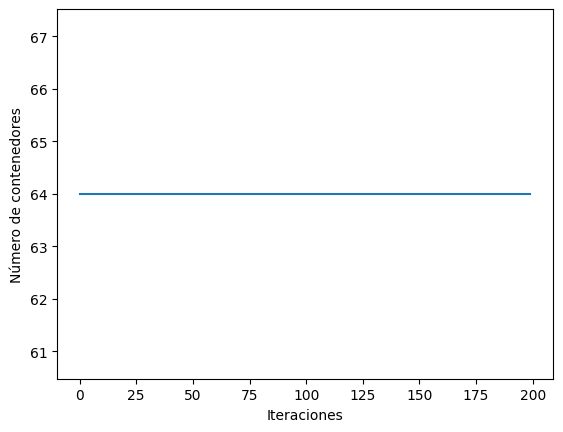

Mejor solución encontrada: [0, 0, 1, 1, 2, 3, 0, 2, 3, 4, 4, 5, 4, 5, 4, 6, 7, 8, 6, 7, 9, 8, 10, 11, 9, 11, 10, 1, 12, 12, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 18, 19, 16, 7, 17, 20, 18, 19, 20, 21, 21, 22, 22, 23, 15, 19, 22, 2, 23, 24, 20, 24, 24, 25, 26, 25, 27, 28, 29, 26, 30, 31, 27, 28, 32, 33, 34, 34, 35, 36, 37, 29, 38, 35, 8, 30, 39, 31, 40, 32, 33, 36, 41, 42, 37, 38, 39, 43, 41, 38, 44, 42, 45, 40, 46, 29, 47, 45, 46, 48, 36, 49, 47, 43, 44, 48, 49, 50, 51, 51, 52, 52, 53, 48, 50, 53, 54, 54, 55, 55, 56, 54, 57, 56, 57, 58, 58, 58, 59, 59, 56, 60, 61, 60, 62, 61, 63]
Número de contenedores en la mejor solución encontrada: 64


In [3]:
import random

def inicializar_poblacion(num_elementos, tamaños, capacidad_contenedor):
    poblacion = []
    for _ in range(num_elementos):
        solucion = []
        contenedores = []
        for i in range(num_elementos):
            # Buscar un contenedor donde el elemento pueda ser colocado
            for j, carga_actual in enumerate(contenedores):
                if carga_actual + tamaños[i] <= capacidad_contenedor:
                    solucion.append(j)
                    contenedores[j] += tamaños[i]
                    break
            else:
                # Si no se encontró un contenedor, crear uno nuevo
                contenedores.append(tamaños[i])
                solucion.append(len(contenedores) - 1)
        poblacion.append(solucion)
    return poblacion

def evaluar_solucion(solucion, tamaños, capacidad_contenedor):
    num_contenedores = max(solucion) + 1
    cargas_contenedor = [0] * num_contenedores
    for i, elemento in enumerate(solucion):
        cargas_contenedor[elemento] += tamaños[i]
    sobre_capacidad = sum(max(0, cargas_contenedor[i] - capacidad_contenedor) for i in range(num_contenedores))
    # Si los elementos no caben en los contenedores, penalizar la solución
    if sobre_capacidad > 0:
        return float('inf')
    else:
        return num_contenedores

import matplotlib.pyplot as plt

def optimizacion_halcones_harris(num_elementos, tamaños, capacidad_contenedor, max_iteraciones):
    poblacion = inicializar_poblacion(num_elementos, tamaños, capacidad_contenedor)
    mejor_solucion = None
    mejor_aptitud = float('inf')
    mejor_aptitud_por_iteracion = []  # Almacena la mejor aptitud de cada iteración

    for _ in range(max_iteraciones):

        for i, solucion in enumerate(poblacion):
            aptitud = evaluar_solucion(solucion, tamaños, capacidad_contenedor)
            if aptitud < mejor_aptitud:
                mejor_aptitud = aptitud
                mejor_solucion = solucion

            solucion_aleatoria = random.choice(poblacion)
            if aptitud < evaluar_solucion(solucion_aleatoria, tamaños, capacidad_contenedor):
                for j in range(num_elementos):
                    if random.random() < 0.5:
                        solucion[j] = solucion_aleatoria[j]

            for j in range(num_elementos):
                if random.random() < 0.5:
                    solucion[j] = mejor_solucion[j]

        # Agregar la mejor aptitud de la iteración actual a la lista
        mejor_aptitud_por_iteracion.append(mejor_aptitud)

    # Graficar el número de contenedores en la mejor solución encontrada en cada iteración
    plt.plot(mejor_aptitud_por_iteracion)
    plt.ylabel('Número de contenedores')
    plt.xlabel('Iteraciones')
    plt.show()

    return mejor_solucion, mejor_aptitud



# Parámetros conocidos
num_contenedores  = 150
peso = [42, 69, 67, 57, 93, 90, 38, 36, 45, 42, 33, 79, 27, 57, 44, 84, 86, 92, 46, 38, 85,33,82, 73, 49, 
70, 59, 23, 57, 72, 74, 69, 33, 42, 28, 46, 30, 64, 29, 74, 41, 49, 55, 98, 80, 32, 25, 38,
82, 30, 35, 39, 57, 84, 62, 50, 55, 27, 30, 36, 20, 78, 47, 26, 45, 41, 58, 98, 91, 96, 73, 
84, 37, 93, 91,43, 73, 85, 81, 79, 71, 80, 76, 83, 41, 78, 70, 23, 42, 87, 43, 84, 60, 55, 
49, 78, 73, 62, 36, 44, 94, 69,32, 96, 70, 84, 58, 78, 25, 80, 58, 66, 83, 24, 98, 60, 42,
43, 43, 39, 97, 57, 81, 62, 75, 81, 23, 43, 50,38, 60, 58, 70, 88, 36, 90, 37, 45, 45, 39,
44, 53, 70, 24, 82, 81, 47, 97, 35, 65, 74, 68, 49, 55, 52, 94,95, 29, 99, 20, 22, 25, 49,
46, 98, 59, 98, 60, 23, 72, 33, 98, 80, 95, 78, 57, 67, 53, 47, 53, 36, 38, 92, 30, 80, 32,
97, 39, 80, 72, 55, 41, 60, 67, 53, 65, 95, 20, 66, 78, 98, 47, 100, 85, 53, 53, 67, 27, 22, 61,
43, 52, 76, 64, 61, 29, 30, 46, 79, 66, 27, 79, 98, 90, 22, 75, 57, 67, 36, 70, 99, 48, 43,
45, 71, 100, 88,48, 27, 39, 38, 100, 60, 42, 20, 69, 24, 23, 92, 32 ]
Capacidad_Contenedor = 150
Iteraciones = 200

mejor_solucion, mejor_aptitud = optimizacion_halcones_harris(num_contenedores , peso , Capacidad_Contenedor, Iteraciones)
print("Mejor solución encontrada:", mejor_solucion)
print("Número de contenedores en la mejor solución encontrada:", mejor_aptitud)
